In [150]:
import pandas as pd
import json
from twython import Twython
import tweepy
import configparser
import matplotlib.pyplot as plt
import numpy as np

In [2]:
config=configparser.ConfigParser()
config.read("../../../config_ac.ini")

['../../../config_ac.ini']

In [7]:
from sys import api_version
api_key=config['twitter']['api_key']
api_secret_key=config['twitter']['api_secret_key']
access_token=config['twitter']['access_token']
access_secret=config['twitter']['access_token_secret']

# authenticate
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
### search by user
# user = 'veritasium'
# limit=300
# tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)

### search by keyword or hashtag (works too for @user)
keywords = "#iPhone14Pro -filter:retweets"
limit = 10000
tweets = tweepy.Cursor(
    api.search_tweets, q=keywords, count=100, lang="en", tweet_mode="extended"
).items(limit)

### create DataFrame
columns = [
    "User",
    "Tweet_time",
    "Tweet",
    "Hashtag",
    "Retweet",
    "Favorite",
    "Join_time",
    "Follower",
    "Friend",
]

data = []

for tweet in tweets:
    data.append(
        [
            tweet.user.screen_name,
            tweet.created_at,
            tweet.full_text,
            tweet.entities["hashtags"],
            tweet.retweet_count,
            tweet.favorite_count,
            tweet.user.created_at,
            tweet.user.followers_count,
            tweet.user.friends_count,
        ]
    )

df = pd.DataFrame(data, columns=columns)

df.head()

,User,Tweet_time,Tweet,Hashtag,Retweet,Favorite,Join_time,Follower,Friend
0,WuKiana1,2022-09-15 07:50:04+00:00,"pc material, anti yellow, waterproof.\nAvailab...","[{'text': 'apple', 'indices': [60, 66]}, {'tex...",0,0,2022-07-15 01:51:10+00:00,0,6
1,corpernews,2022-09-15 07:47:17+00:00,"Few amongst the features of the new IOS 16, ha...","[{'text': 'ios16', 'indices': [91, 97]}, {'tex...",1,2,2021-08-18 00:45:57+00:00,141,393
2,Hina_honey27,2022-09-15 07:38:52+00:00,Every year this apple launches iphone to make ...,"[{'text': 'iPhone', 'indices': [81, 88]}, {'te...",0,1,2021-07-08 21:05:20+00:00,3100,4991
3,qiandutech11,2022-09-15 07:26:42+00:00,Are you looking for the new design phone cases...,"[{'text': 'iphone14', 'indices': [68, 77]}, {'...",0,0,2021-10-30 01:00:46+00:00,3,26
4,torro_uk,2022-09-15 07:26:40+00:00,Expecting an iPhone 14 delivery tomorrow? Don’...,"[{'text': 'iphone14', 'indices': [163, 172]}, ...",0,0,2013-03-18 19:56:37+00:00,4886,993


In [14]:
df.shape

(10000, 9)

In [280]:
i14=pd.read_csv("../data/raw/iPhone14x10k_RAW.csv")
i14.head()

,Unnamed: 0,User,DateTime,Tweet
0,0,bosesubash56,2022-09-14 14:17:04+00:00,@WS_MobileTrans #nothingchangedaftertransfer a...
1,1,you_swerve,2022-09-14 14:15:18+00:00,RT @insanetweet: iPhone 8 while upgrading to i...
2,2,MarkVenaTechGuy,2022-09-14 14:13:51+00:00,My #SmartTechCheck newsletter thoughts about t...
3,3,WinPhanKyle,2022-09-14 14:13:16+00:00,RT @saradietschy: #iPhone14 Unboxing time!! Go...
4,4,zaheenhafzer,2022-09-14 14:13:04+00:00,RT @zollotech: But first the cases…#iphone14\r...


In [281]:
i14['Date'] = pd.to_datetime(i14['DateTime']).dt.date
i14['Time'] = pd.to_datetime(i14['DateTime']).dt.time
i14['Hour'] = pd.to_datetime(i14['DateTime']).dt.hour

In [282]:
i14=i14.drop(columns="DateTime")

In [283]:
i14.head()

,Unnamed: 0,User,Tweet,Date,Time,Hour
0,0,bosesubash56,@WS_MobileTrans #nothingchangedaftertransfer a...,2022-09-14,14:17:04,14
1,1,you_swerve,RT @insanetweet: iPhone 8 while upgrading to i...,2022-09-14,14:15:18,14
2,2,MarkVenaTechGuy,My #SmartTechCheck newsletter thoughts about t...,2022-09-14,14:13:51,14
3,3,WinPhanKyle,RT @saradietschy: #iPhone14 Unboxing time!! Go...,2022-09-14,14:13:16,14
4,4,zaheenhafzer,RT @zollotech: But first the cases…#iphone14\r...,2022-09-14,14:13:04,14


In [275]:
i14.shape

(10000, 6)

In [273]:
i14['Hour'].value_counts()

5     602
6     561
13    552
17    543
7     512
15    476
19    453
9     451
12    440
8     439
3     439
4     437
16    433
11    431
14    414
10    414
2     401
1     374
18    363
0     335
20    262
22    234
21    227
23    207
Name: Hour, dtype: int64

In [287]:
#i14_new=i14.groupby(i14[('Date', 'Hour')])#['Tweet'].count().plot(kind='bar', figsize=(23, 8))

<AxesSubplot:xlabel='Date,Hour'>

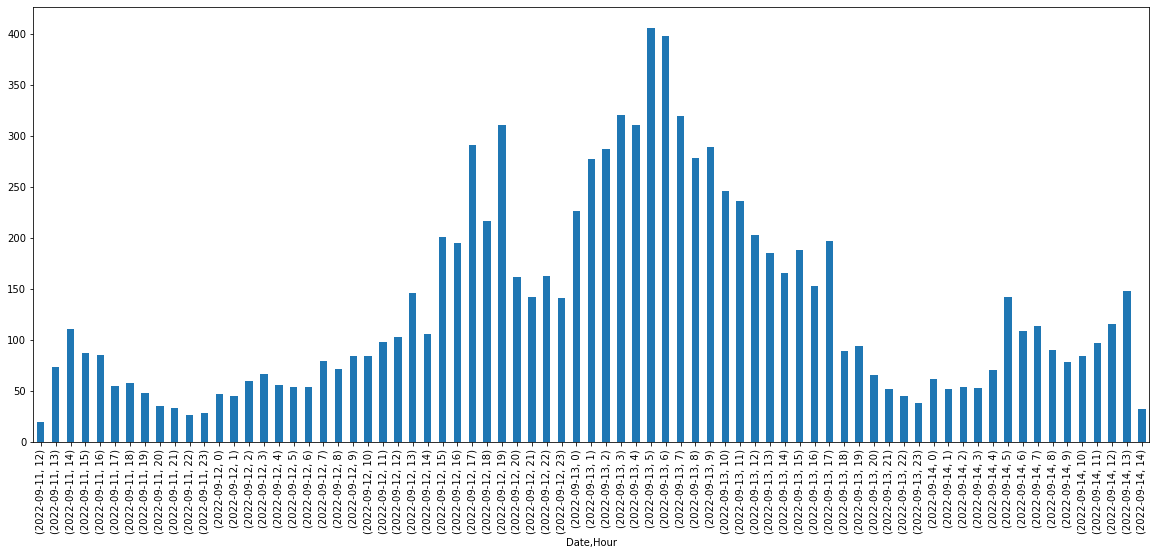

In [290]:
i14_new = i14.groupby(['Date','Hour'])['Hour'].count()
i14_new.plot(kind='bar', figsize=(20, 8))

<AxesSubplot:xlabel='Hour'>

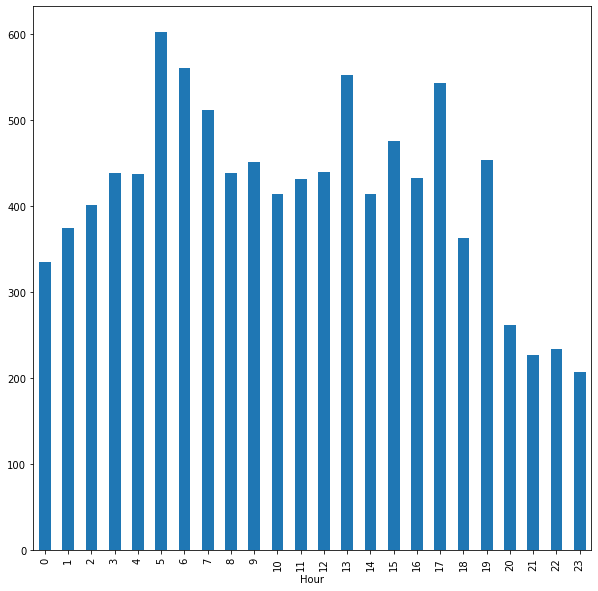

In [225]:
i14.groupby(by=['Hour'])['Tweet'].count().plot(kind='bar', figsize=(10, 10))

<AxesSubplot:xlabel='User'>

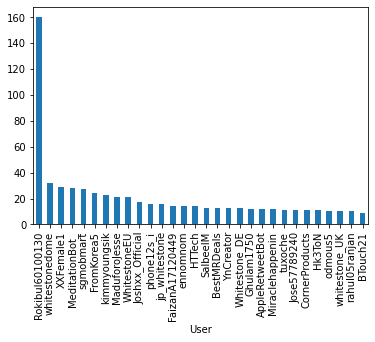

In [190]:
i14_grp=i14.groupby(by=['User'])['Tweet'].count().sort_values(ascending=False).head(30)
i14_grp.plot(kind='bar')

In [191]:
i14_grp_dt=i14.groupby(by=['User', 'Date'], axis=0, sort=True)['Tweet'].count().sort_values(ascending=False)
i14_grp_dt

User             Date      
Rokibul60100130  2022-09-12    75
                 2022-09-13    41
                 2022-09-14    25
                 2022-09-11    19
MeditationBot_   2022-09-12    14
                               ..
Sanjeev41097156  2022-09-14     1
Sani__UtD        2022-09-13     1
Sanele524        2022-09-12     1
SaneInWackyWrld  2022-09-13     1
zzulovess        2022-09-13     1
Name: Tweet, Length: 8864, dtype: int64

In [204]:
i14_grp_dt=i14.groupby(by=['Date', 'Hour'], axis=0, sort=True)['Tweet'].count().sort_values(ascending=False)
i14_grp_dt

Date        Hour
2022-09-13  5       406
            6       398
            3       320
            7       319
2022-09-12  19      311
                   ... 
2022-09-11  21       33
2022-09-14  14       32
2022-09-11  23       28
            22       26
            12       19
Name: Tweet, Length: 75, dtype: int64

(array([19., 18.,  8.,  9.,  6.,  4.,  4.,  5.,  0.,  2.]),
 array([ 19. ,  57.7,  96.4, 135.1, 173.8, 212.5, 251.2, 289.9, 328.6,
        367.3, 406. ]),
 <BarContainer object of 10 artists>)

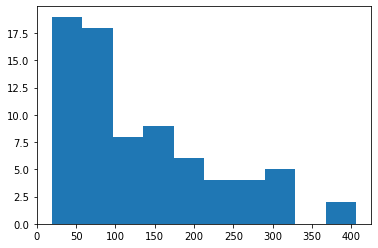

In [209]:
plt.hist(i14_grp_dt)

In [192]:
i14.groupby('User')['Tweet'].count().sort_values(ascending=False)

User
Rokibul60100130    160
whitestonedome      32
XXFemale1           29
MeditationBot_      28
sgmobmart           27
                  ... 
Shafi786Mohamed      1
Shadeymiles          1
Shaaanu08            1
SexcVee              1
zzulovess            1
Name: Tweet, Length: 8519, dtype: int64

In [196]:
i14_hour=i14.groupby('Time')['Tweet'].count()
i14_hour

Time
0     335
1     374
2     401
3     439
4     437
5     602
6     561
7     512
8     439
9     451
10    414
11    431
12    440
13    552
14    414
15    476
16    433
17    543
18    363
19    453
20    262
21    227
22    234
23    207
Name: Tweet, dtype: int64

<AxesSubplot:xlabel='Time'>

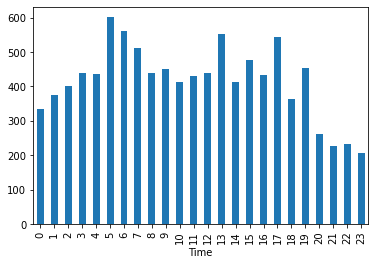

In [197]:
i14_hour.plot(kind='bar')

In [174]:
#i14_grp_dt.plot(kind='bar')

In [164]:
#i14['normalize']=i14['User'].value_counts(normalize=True)*100

In [170]:
#i14.head()

In [101]:
#i14pro=pd.read_csv("../data/raw/iPhone14Prox10k_RAW.csv")
#i14pro.head()

In [45]:
i14pro['User'].nunique()

8703

In [56]:
#i14pro['User'].value_counts(normalize=True)*100